In [10]:

##Using a pre-trained model InceptionV3 in Keras to extract the feature of a given image

from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
import numpy as np

model = InceptionV3(weights='imagenet', pooling = 'avg', include_top=True)
model.summary()
import warnings
warnings.filterwarnings("ignore")

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 149, 149, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 149, 149, 32) 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

In [2]:
[(i, model.layers[i].name, model.layers[i].output_shape[-1]) for i in range(len(model.layers))]
 

[(0, 'input_1', 3),
 (1, 'conv2d_1', 32),
 (2, 'batch_normalization_1', 32),
 (3, 'activation_1', 32),
 (4, 'conv2d_2', 32),
 (5, 'batch_normalization_2', 32),
 (6, 'activation_2', 32),
 (7, 'conv2d_3', 64),
 (8, 'batch_normalization_3', 64),
 (9, 'activation_3', 64),
 (10, 'max_pooling2d_1', 64),
 (11, 'conv2d_4', 80),
 (12, 'batch_normalization_4', 80),
 (13, 'activation_4', 80),
 (14, 'conv2d_5', 192),
 (15, 'batch_normalization_5', 192),
 (16, 'activation_5', 192),
 (17, 'max_pooling2d_2', 192),
 (18, 'conv2d_9', 64),
 (19, 'batch_normalization_9', 64),
 (20, 'activation_9', 64),
 (21, 'conv2d_7', 48),
 (22, 'conv2d_10', 96),
 (23, 'batch_normalization_7', 48),
 (24, 'batch_normalization_10', 96),
 (25, 'activation_7', 48),
 (26, 'activation_10', 96),
 (27, 'average_pooling2d_1', 192),
 (28, 'conv2d_6', 64),
 (29, 'conv2d_8', 64),
 (30, 'conv2d_11', 96),
 (31, 'conv2d_12', 32),
 (32, 'batch_normalization_6', 64),
 (33, 'batch_normalization_8', 64),
 (34, 'batch_normalization_11', 9

In [46]:
from keras import Model
model1 = Model(inputs=model.inputs, outputs=model.layers[311].output)

In [47]:
%pwd

'/home/ec2-user/SageMaker'

In [48]:
import os
import pandas as pd
INV3_feature_dic = {}
INV3_feature_list=[]
directory = '/home/ec2-user/SageMaker/fashionbeans/maskeditems'
counter=0
onlyfiles = len(next(os.walk(directory))[2])

for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        #print(filename)
    
        img = image.load_img('/home/ec2-user/SageMaker/fashionbeans/maskeditems/'+str(filename), target_size=(299, 299))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        INV3_feature = model1.predict(img_data)
        INV3_feature_np = np.array(INV3_feature)
        INV3_feature_list.append(INV3_feature_np.flatten())
    
        key=str(filename)

        INV3_feature_dic[key]=INV3_feature_np
    

        #os.rename(directory+'/'+str(filename),directory+'/'+str(filename)+'-ex')
  
        counter+=1

        print(str(counter)+'of'+str(onlyfiles))
    
INV3_feature_list_np = np.array(INV3_feature_list)

1of9574
2of9574
3of9574
4of9574
5of9574
6of9574
7of9574
8of9574
9of9574
10of9574
11of9574
12of9574
13of9574
14of9574
15of9574
16of9574
17of9574
18of9574
19of9574
20of9574
21of9574
22of9574
23of9574
24of9574
25of9574
26of9574
27of9574
28of9574
29of9574
30of9574
31of9574
32of9574
33of9574
34of9574
35of9574
36of9574
37of9574
38of9574
39of9574
40of9574
41of9574
42of9574
43of9574
44of9574
45of9574
46of9574
47of9574
48of9574
49of9574
50of9574
51of9574
52of9574
53of9574
54of9574
55of9574
56of9574
57of9574
58of9574
59of9574
60of9574
61of9574
62of9574
63of9574
64of9574
65of9574
66of9574
67of9574
68of9574
69of9574
70of9574
71of9574
72of9574
73of9574
74of9574
75of9574
76of9574
77of9574
78of9574
79of9574
80of9574
81of9574
82of9574
83of9574
84of9574
85of9574
86of9574
87of9574
88of9574
89of9574
90of9574
91of9574
92of9574
93of9574
94of9574
95of9574
96of9574
97of9574
98of9574
99of9574
100of9574
101of9574
102of9574
103of9574
104of9574
105of9574
106of9574
107of9574
108of9574
109of9574
110of9574
111of957

In [49]:
len(INV3_feature_list)

9574

In [50]:
len(INV3_feature_dic.keys())

9574

In [51]:
len(INV3_feature_dic['62+30-masked-7.jpg'][0])

2048

In [52]:
valid_features_pants=pd.DataFrame(INV3_feature_list)
valid_features_pants.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.021277,0.000000,0.532861,0.075637,0.588977,0.415568,1.267455,0.079926,0.000000,0.711304,...,0.987002,0.108074,0.000000,1.175538,0.173744,0.099712,0.737562,0.888826,0.231819,0.457108
1,0.090892,0.024984,0.296919,0.144402,0.455168,0.499795,1.382575,0.019903,0.000000,0.523430,...,0.517593,0.033062,0.000000,1.188316,0.123150,0.394500,0.926875,0.430742,0.030132,0.016706
2,0.019203,0.061042,0.318396,0.050508,0.200710,0.029855,0.536736,0.438832,0.017465,0.862236,...,0.079368,0.716864,0.053453,0.276414,0.413125,0.132756,1.042508,0.174727,0.194212,0.003031
3,0.166819,0.359709,0.559463,0.440279,0.158554,0.103543,0.647215,0.118631,0.183440,0.172409,...,0.667646,0.484724,0.415602,0.038230,0.529770,0.089428,1.185851,0.519166,0.007062,0.065882
4,0.418327,0.181807,0.291556,0.324786,0.092331,0.265034,0.665509,0.200829,0.020484,0.320931,...,0.507198,0.453871,0.000270,0.196668,0.444661,0.560312,0.877445,0.965838,0.180802,0.102244


In [ ]:
list(INV3_feature_dic.keys())[0]

In [ ]:
valid_features_combo['names']=list(INV3_feature_dic.keys())
valid_features_combo.set_index('names', drop=True, append=False, inplace=True)
valid_features_combo.head()

In [ ]:
%cd '/home/ec2-user/SageMaker/fashionbeans/validation'

In [ ]:
valid_features_combo.to_csv('valid_features_combo.csv')

In [2]:
import pandas as pd
import random
import csv
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
import matplotlib.gridspec as gridspec

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn import preprocessing
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn import preprocessing

In [3]:
in_features = pd.read_csv('/home/ec2-user/SageMaker/inspo-book/new_features_names.csv', index_col='names')
in_features.head()

,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,labels,label names
names,,,,,,,,,,,,,,,,,,,,,
54+14-masked-0.jpg,0.000000,0.628713,0.049154,0.084659,0.291767,0.176192,0.138081,0.635659,0.051259,0.495437,...,1.193870,1.458372,0.685477,0.000000,0.402774,0.068702,0.525575,0.000000,0,bag
55+5-masked-0.jpg,0.000000,0.112951,0.916327,0.547432,0.106296,0.061165,0.737093,0.322698,0.245354,0.259251,...,0.021937,0.864018,0.000000,0.000000,0.203484,0.062209,0.062978,0.000000,0,bag
56+27-masked-0.jpg,0.032500,0.229543,0.153241,0.427426,0.202888,0.046292,0.490080,0.354047,0.112013,0.355051,...,0.046166,0.963321,0.095918,0.000000,0.158652,0.000000,0.340487,0.017623,0,bag
41+7-masked-0.jpg,0.473770,0.410100,0.186851,0.705802,0.048155,0.054226,0.352429,0.550619,0.000000,0.624875,...,0.152404,0.540907,0.099566,0.313425,1.201367,0.022931,0.090065,0.131879,0,bag
18+21-masked-0.jpg,0.229182,0.448148,0.282578,0.613092,0.127565,0.103203,0.705114,0.693168,0.464673,0.304895,...,0.072795,0.553210,0.000768,0.889743,0.758679,0.006529,0.210188,0.050786,0,bag


In [89]:
## Scaling the features 

scaler = preprocessing.StandardScaler()
in_features.loc[:,'0':'2047'] = scaler.fit_transform(in_features.loc[:,'0':'2047'])

In [4]:
sample_df = in_features.loc[in_features['labels'] == 7]
print(sample_df.shape)
sample_df.head()

(2204, 2050)


,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,labels,label names
names,,,,,,,,,,,,,,,,,,,,,
53+29-masked-7.jpg,0.064181,0.227416,0.039690,1.224343,0.258684,0.213255,0.165348,0.352456,0.351012,0.186536,...,0.278548,0.143241,0.883341,0.014899,0.020608,1.284696,0.410880,0.803880,7,pants
64+28-masked-7.jpg,0.137745,0.554747,0.534660,0.024673,0.337805,0.264348,0.419084,0.730823,0.000000,0.036604,...,0.014900,1.552887,0.270391,0.207199,0.194192,0.824910,1.222057,0.008653,7,pants
50+8-masked-7.jpg,0.009358,0.068476,0.609873,0.378183,0.361784,0.048498,0.190058,0.524362,0.002091,0.407882,...,0.056369,0.787769,1.155562,0.177898,1.668662,1.487621,0.568249,0.122872,7,pants
17+27-masked-7.jpg,0.000000,0.303723,0.904520,0.711600,0.575596,0.029905,0.568344,1.265792,0.014116,0.055184,...,0.003860,1.201501,0.140430,0.842697,1.725718,1.071233,1.713811,0.218784,7,pants
50+2-masked-7.jpg,0.075008,0.219089,0.238100,0.231387,0.185238,0.322935,1.222961,0.615665,0.051081,0.029603,...,0.052170,0.217703,0.016269,0.373321,1.646789,0.897884,0.065611,0.300454,7,pants


In [5]:
cos_val = sample_df.iloc[:, :2047].dot(sample_df.iloc[:, :2047].T)
cos_val.head()

names,53+29-masked-7.jpg,64+28-masked-7.jpg,50+8-masked-7.jpg,17+27-masked-7.jpg,50+2-masked-7.jpg,59+30-masked-7.jpg,36+13-masked-7.jpg,53+20-masked-7.jpg,67+6-masked-7.jpg,69+17-masked-7.jpg,...,processed56+30-masked-7.jpg,35+4-masked-7.jpg,52+6-masked-7.jpg,11+30-masked-7.jpg,45+18-masked-7.jpg,46+8-masked-7.jpg,36+28-masked-7.jpg,68+23-masked-7.jpg,63+12-masked-7.jpg,11+26-masked-7.jpg
names,,,,,,,,,,,,,,,,,,,,,
53+29-masked-7.jpg,1172.744775,584.999437,587.162659,720.077331,426.191812,494.871018,661.978735,635.396835,625.463639,597.138433,...,673.037039,688.138835,561.503182,422.060482,460.262805,534.391205,526.196312,641.243727,613.503769,551.690791
64+28-masked-7.jpg,584.999437,821.964404,589.659315,711.651262,476.143474,519.593179,535.701400,486.251271,529.671109,459.835606,...,565.292927,564.079765,398.815918,359.670372,428.327319,372.458795,387.955736,453.363811,467.209439,439.622194
50+8-masked-7.jpg,587.162659,589.659315,887.025396,767.601569,498.179002,592.370820,656.550400,574.746948,648.991659,526.009779,...,514.816731,653.402135,470.219171,412.997356,499.610312,398.736848,460.540603,480.997118,501.869046,518.285703
17+27-masked-7.jpg,720.077331,711.651262,767.601569,1287.884690,644.292100,662.146260,681.629997,643.042350,684.718771,645.213942,...,680.393039,747.983996,531.186480,491.608949,529.485257,459.797559,502.283011,628.331162,608.816762,640.034000
50+2-masked-7.jpg,426.191812,476.143474,498.179002,644.292100,653.159661,462.359697,457.070102,405.028730,432.823477,384.342545,...,385.150948,519.254884,359.765752,306.620892,338.048232,320.408002,360.922485,343.080273,337.643411,410.123243


3+26-masked-7.jpg


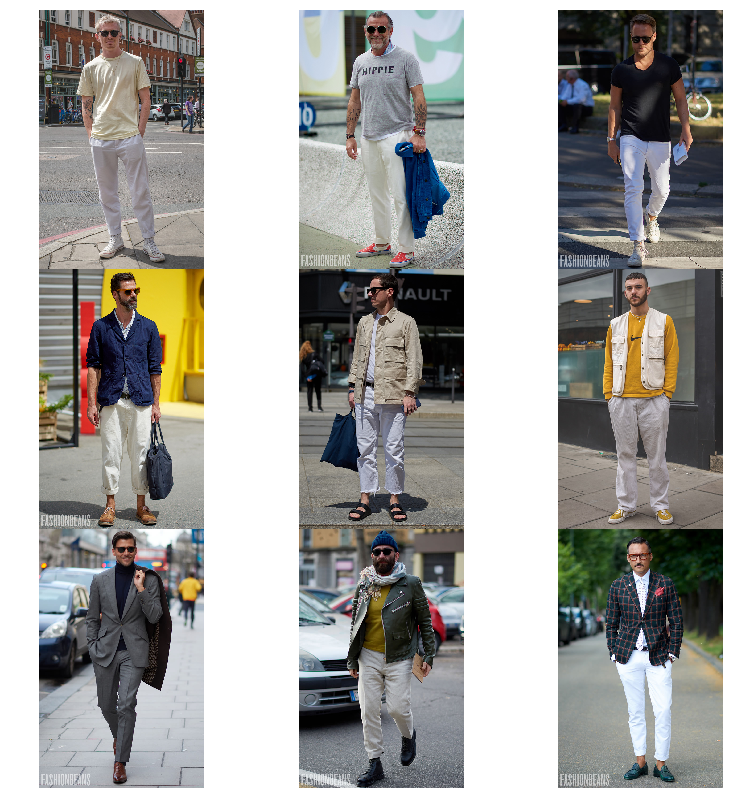

In [28]:
### Plotting the top n matches of the each item within it's row of cosine values

#n=number of items to test
n=1
#m=number of matches to present
m=9
for i in range(n):
    r=random.randrange(0,cos_val.shape[1]+1)
    
    print(list(cos_val.index.values)[r])
    cos_val_sort = cos_val.iloc[r,:].sort_values(ascending = False)
    
    fig5 = plt.figure(constrained_layout=True,figsize=(16, 16))
    spec5 = gridspec.GridSpec(ncols=3, nrows=1+m//3)
    spec5.update(wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845) 
    counter=1
    for row in range(1+m//3):
        for col in range(3):
            if counter < 1+m:
                ax = fig5.add_subplot(spec5[row, col])
                ax.imshow(mpimg.imread('/home/ec2-user/SageMaker/inspo-book/fashionbeans/processedimages/'+str(cos_val_sort.index[counter - 1]).split('-')[0]+'.jpg'))
                ax.axis('off')
                counter+=1